In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
print (tf.__version__)
from keras.preprocessing.image import ImageDataGenerator

2.6.2


## **Data Preprocessing**

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   featurewise_center=True,
                                   featurewise_std_normalization=True)
training_set = train_datagen.flow_from_directory('../input/emotion-detection-fer/train', 
                                                 target_size = (48,48), 
                                                 batch_size = 64, 
                                                 color_mode = 'grayscale' , 
                                                 class_mode = 'categorical')

Found 28709 images belonging to 7 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = train_datagen.flow_from_directory('../input/emotion-detection-fer/test', 
                                             target_size = (48,48), 
                                             batch_size = 64, 
                                             color_mode = 'grayscale', 
                                             class_mode = 'categorical')

Found 7178 images belonging to 7 classes.


## **Building CNN**

In [6]:
#Initializing CNN
cnn = tf.keras.models.Sequential()

2022-03-20 17:32:53.209290: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-20 17:32:53.287089: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-20 17:32:53.287772: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-20 17:32:53.289294: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [7]:
################ 1st Layer ################
#Convolution
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu',input_shape = [48,48,1]))
#Pooling
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
cnn.add(tf.keras.layers.Dropout(0.25))

In [8]:
################  2nd Layer ################
#Convolution
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu',input_shape = [48,48,1]))
#Pooling
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
cnn.add(tf.keras.layers.Dropout(0.25))

In [9]:
################  3rd Layer ################
#Convolution
cnn.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu', input_shape = [48,48,1]))
#Pooling
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:
################  4th Layer ################
#Convolution
cnn.add(tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, activation = 'relu', input_shape = [48,48,1]))
#Pooling
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
#Flattening
cnn.add(tf.keras.layers.Flatten())

In [12]:
#Full Connection

#Hidden Layers
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.25))

In [13]:
cnn.add(tf.keras.layers.Dense(units = 512, activation = 'relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Dropout(0.25))

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units = 7, activation = 'softmax'))

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 21, 21, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0

## **Training the CNN** 

In [16]:
#Compiling
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#Training and evaluating
output = cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
2022-03-20 17:32:56.038786: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-03-20 17:32:58.270764: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


449/449 [==============================] - 177s 378ms/step - loss: 2.0142 - accuracy: 0.2487 - val_loss: 2.3601 - val_accuracy: 0.2591
Epoch 2/50
449/449 [==============================] - 40s 89ms/step - loss: 1.6525 - accuracy: 0.3618 - val_loss: 1.4829 - val_accuracy: 0.4210
Epoch 3/50
449/449 [==============================] - 40s 89ms/step - loss: 1.5125 - accuracy: 0.4134 - val_loss: 1.3891 - val_accuracy: 0.4660
Epoch 4/50
449/449 [==============================] - 40s 89ms/step - loss: 1.4209 - accuracy: 0.4549 - val_loss: 1.4865 - val_accuracy: 0.4393
Epoch 5/50
449/449 [==============================] - 40s 89ms/step - loss: 1.3741 - accuracy: 0.4726 - val_loss: 1.4263 - val_accuracy: 0.4544
Epoch 6/50
449/449 [==============================] - 40s 89ms/step - loss: 1.3292 - accuracy: 0.4922 - val_loss: 1.3377 - val_accuracy: 0.4847
Epoch 7/50
449/449 [==============================] - 40s 88ms/step - loss: 1.3078 - accuracy: 0.4999 - val_loss: 1.2650 - val_accuracy: 0.5215
E

113/113 - 7s - loss: 1.0036 - accuracy: 0.6278


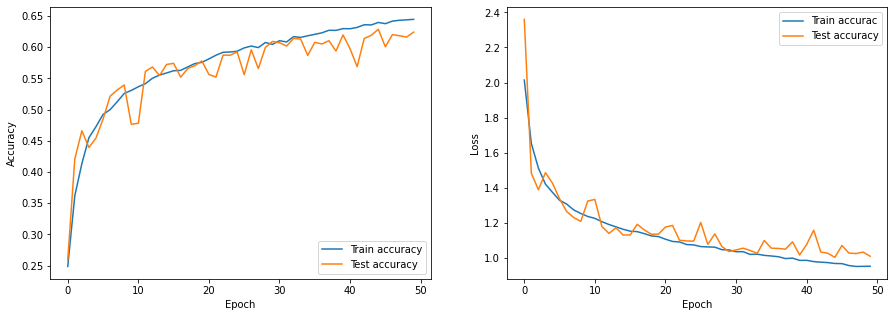

In [17]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.plot(output.history['accuracy'], label='accuracy')
plt.plot(output.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train accuracy','Test accuracy'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(output.history['loss'], label='loss')
plt.plot(output.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train accurac','Test accuracy'], loc='upper right')

test_loss, test_acc = cnn.evaluate(test_set, verbose=2)

In [19]:
cnn.save("Emotion_detect")